In [1]:
import geopandas as gpd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importando o shapefile de RN

In [2]:
gdf = gpd.read_file('Shapes/RN/24SEE250GC_SIR.shp')
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 4311 entries, 0 to 4310
Data columns (total 14 columns):
ID            4311 non-null int64
CD_GEOCODI    4311 non-null object
TIPO          4311 non-null object
CD_GEOCODB    1539 non-null object
NM_BAIRRO     1539 non-null object
CD_GEOCODS    4311 non-null object
NM_SUBDIST    910 non-null object
CD_GEOCODD    4311 non-null object
NM_DISTRIT    4311 non-null object
CD_GEOCODM    4311 non-null object
NM_MUNICIP    4311 non-null object
NM_MICRO      4311 non-null object
NM_MESO       4311 non-null object
geometry      4311 non-null object
dtypes: int64(1), object(13)
memory usage: 471.6+ KB


In [3]:
gdf.sort_values('CD_GEOCODI',inplace = True)

# Importando os resultados do universo  para RR

In [4]:
dados = pd.read_csv('Planilhas/RN/CSV/Basico_RN.csv',sep =';')

In [5]:
dados.rename(columns={'Cod_setor':'CD_GEOCODI'}, inplace=True)
dados.shape

(4289, 14)

In [6]:
dados.head()

,CD_GEOCODI,Tipo_setor,V001,V002,V003,V004,V005,V006,V007,V008,V009,V010,V011,V012
0,240010905000001,0,87.0,276.0,"3,17","2,73","534,07","101768,11","588,15","79989,08","309,33","128865,34","559,63","92790,07"
1,240010905000002,0,160.0,608.0,"3,8","4,8","460,39","81469,25","526,16","58336,37","250,65","91098,05","483,19","63148,76"
2,240010905000003,0,229.0,815.0,"3,56","3,23","589,68","1278759,28","789,68","1556170,13","320,1","541456,51","682,83","908410,67"
3,240010905000004,0,88.0,259.0,"2,94","1,39","961,83","576891,5","1007,63","557986,55","570,32","561080,8","885,82","592215,48"
4,240010905000005,0,129.0,423.0,"3,28","1,89","1296,43","2321536,28","1359,67","2349019,65","725,15","1903605,91","1186,61","2570451,04"


# Fazendo um merge entre o geodataframe e o dataframe de dados do universo

In [7]:
gdf['CD_GEOCODI']= pd.to_numeric(gdf['CD_GEOCODI'])

In [8]:
rn = pd.merge(gdf,dados, on='CD_GEOCODI')

In [9]:
rn.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 4289 entries, 0 to 4288
Data columns (total 27 columns):
ID            4289 non-null int64
CD_GEOCODI    4289 non-null int64
TIPO          4289 non-null object
CD_GEOCODB    1523 non-null object
NM_BAIRRO     1523 non-null object
CD_GEOCODS    4289 non-null object
NM_SUBDIST    895 non-null object
CD_GEOCODD    4289 non-null object
NM_DISTRIT    4289 non-null object
CD_GEOCODM    4289 non-null object
NM_MUNICIP    4289 non-null object
NM_MICRO      4289 non-null object
NM_MESO       4289 non-null object
geometry      4289 non-null object
Tipo_setor    4289 non-null int64
V001          4273 non-null float64
V002          4273 non-null float64
V003          4273 non-null object
V004          4273 non-null object
V005          4273 non-null object
V006          4273 non-null object
V007          4271 non-null object
V008          4271 non-null object
V009          4288 non-null object
V010          4288 non-null object
V011        

In [10]:
del gdf
del dados

Text(0.5,1,'RIO GRANDE DO NORTE - RN')

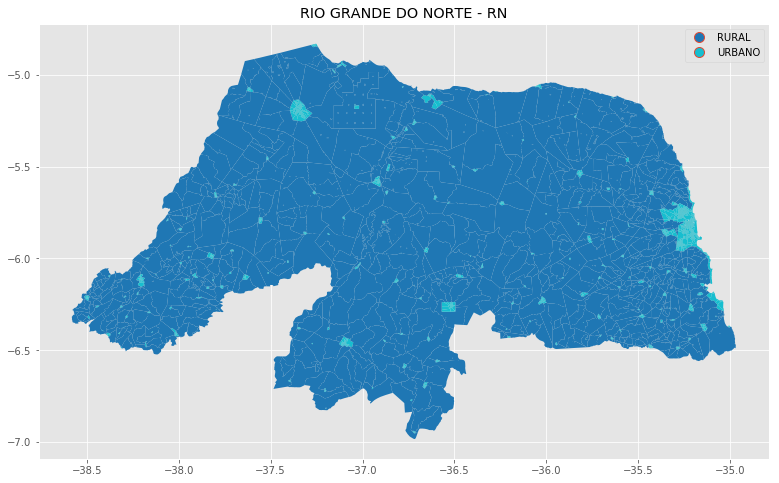

In [11]:
plt.style.use('ggplot')
rn.plot(column = 'TIPO',figsize = (17,8),legend = True)
plt.title('RIO GRANDE DO NORTE - RN')

# Utilizando a projeção de Albers para calcular as áreas

In [11]:
rn['AREA'] = rn.to_crs({'proj': 'aea'}).geometry.area/10**6

# Importando as regiões urbanas definidas pelo estudo da EMBRAPA em 2015

In [12]:
areas_urbanas_br_15 = gpd.read_file('Embrapa/areas_urbanas_br_15.shp')

In [13]:
areas_urbanas_br_15['Area'] = areas_urbanas_br_15.to_crs({'proj': 'aea'}).geometry.area/10**6

In [14]:
areas_urbanas_rn_15 = areas_urbanas_br_15[areas_urbanas_br_15['UF']=='RN']
del areas_urbanas_br_15

In [15]:
areas_urbanas_rn_15.head()

,Municipio,UF,Area_Urb,Geocodigo,geometry,Area
1624,ArÃªs,RN,1.264,2401206.0,POLYGON ((-35.17784236307739 -6.19545716369447...,1.264188
1629,Augusto Severo,RN,1.552,2401305.0,POLYGON ((-37.32138273838238 -5.85520268567583...,1.551597
1633,BaÃ­a Formosa,RN,0.816,2401404.0,POLYGON ((-35.01088330691547 -6.37259416262073...,0.815591
1650,Galinhos,RN,0.417,2404101.0,POLYGON ((-36.27741492464619 -5.09137064640319...,0.416535
1727,Major Sales,RN,0.662,2407252.0,POLYGON ((-38.32427598536199 -6.40268111053831...,0.661965


In [16]:
areas_urbanas_rn_15.rename(columns={'Geocodigo':'CD_GEOCODM'}, inplace=True)
areas_urbanas_rn_15['CD_GEOCODM']=areas_urbanas_rn_15['CD_GEOCODM'].apply(lambda x: int(x))
areas_urbanas_rn_15.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 167 entries, 1624 to 1910
Data columns (total 6 columns):
Municipio     167 non-null object
UF            167 non-null object
Area_Urb      167 non-null float64
CD_GEOCODM    167 non-null int64
geometry      167 non-null object
Area          167 non-null float64
dtypes: float64(2), int64(1), object(3)
memory usage: 9.1+ KB


In [17]:
rn.fillna('0',inplace = True)

# Visualizando as distribuições de Moradias, Moradores e área 

In [22]:
rn['V001']= pd.to_numeric(rn['V001'])
rn['V002']= pd.to_numeric(rn['V002'])

In [23]:
rn['Densidade Moradias'] = rn.V001/rn.AREA

/home/alan/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/alan/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Densidade Moradias')

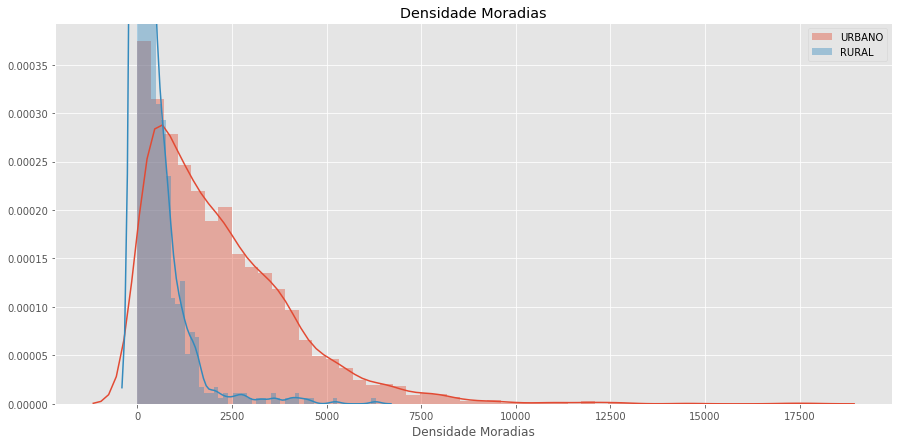

In [24]:
plt.style.use('ggplot')
fig = plt.figure(figsize = (15,7))
sns.distplot(rn[rn['TIPO'] =='URBANO']['Densidade Moradias'])
sns.distplot(rn[rn['TIPO']=='RURAL']['Densidade Moradias'])
plt.legend(['URBANO','RURAL'])
plt.title('Densidade Moradias')

In [26]:
print('RURAL','\n',rn[rn['TIPO']=='RURAL']['Densidade Moradias'].describe())
print('URBANO','\n',rn[rn['TIPO']=='URBANO']['Densidade Moradias'].describe())

RURAL 
 count    1385.000000
mean      293.885559
std       577.792604
min         0.000000
25%         2.735137
50%        12.537521
75%       374.155673
max      6293.316917
Name: Densidade Moradias, dtype: float64
URBANO 
 count     2904.000000
mean      2188.116197
std       1915.271371
min          0.000000
25%        720.347880
50%       1732.519594
75%       3178.257097
max      17772.311679
Name: Densidade Moradias, dtype: float64


/home/alan/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/alan/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Nº de Moradias no SC')

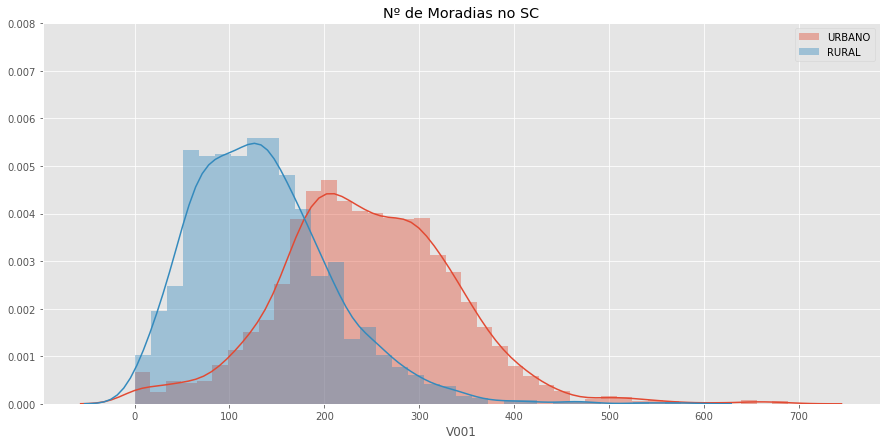

In [19]:
plt.style.use('ggplot')
rn['V001'] = pd.to_numeric(rn['V001'])
rn['V002'] = pd.to_numeric(rn['V002'])
fig = plt.figure(figsize = (15,7))
sns.distplot(rn[rn['TIPO'] =='URBANO']['V001'])
sns.distplot(rn[rn['TIPO']=='RURAL']['V001'])
plt.legend(['URBANO','RURAL'])
plt.ylim((0,0.008))
plt.title('Nº de Moradias no SC')

## Descrição do Número de Moradias por setor censitários urbanos e rurais

In [20]:
print('RURAL','\n',rn[rn['TIPO']=='RURAL']['V001'].describe())
print('URBANO','\n',rn[rn['TIPO']=='URBANO']['V001'].describe())

RURAL 
 count    1385.000000
mean      135.550903
std        74.492710
min         0.000000
25%        81.000000
50%       128.000000
75%       178.000000
max       576.000000
Name: V001, dtype: float64
URBANO 
 count    2904.000000
mean      245.101584
std        93.286293
min         0.000000
25%       186.000000
50%       241.500000
75%       304.000000
max       688.000000
Name: V001, dtype: float64


/home/alan/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/alan/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


(0, 0.05)

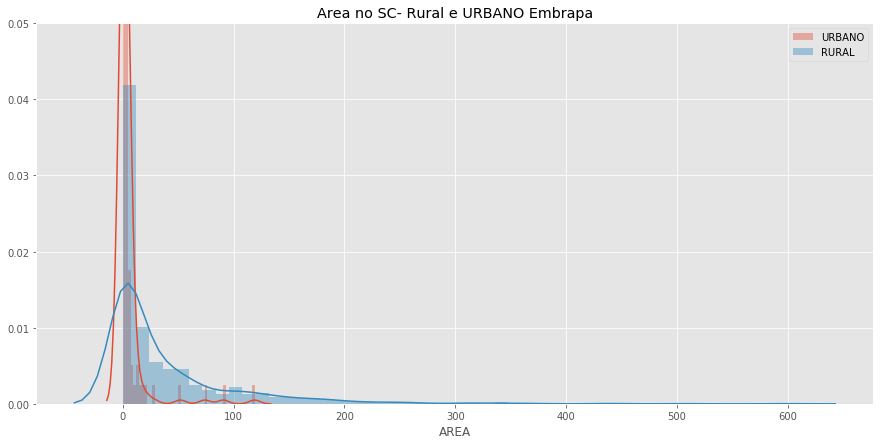

In [22]:
fig = plt.figure(figsize = (15,7))

sns.distplot(areas_urbanas_rn_15['Area'])
plt.legend(['URBANO'])
sns.distplot(rn[rn['TIPO']=='RURAL']['AREA'])
plt.legend(['URBANO','RURAL'])
plt.title('Area no SC- Rural e URBANO Embrapa')
plt.ylim((0,0.05))

## Descrição da área por setor censitários urbanos e rurais

In [23]:
print('URBANO','\n',areas_urbanas_rn_15['Area'].describe())
print('RURAL','\n',rn[rn['TIPO']=='RURAL']['AREA'].describe())

URBANO 
 count    167.000000
mean       4.209430
std       13.549384
min        0.156451
25%        0.658654
50%        1.152601
75%        2.362373
max      118.927275
Name: Area, dtype: float64
RURAL 
 count    1385.000000
mean       37.244943
std        61.852893
min         0.000991
25%         0.235307
50%        11.460977
75%        49.585132
max       599.134604
Name: AREA, dtype: float64


/home/alan/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/alan/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


(0, 0.003)

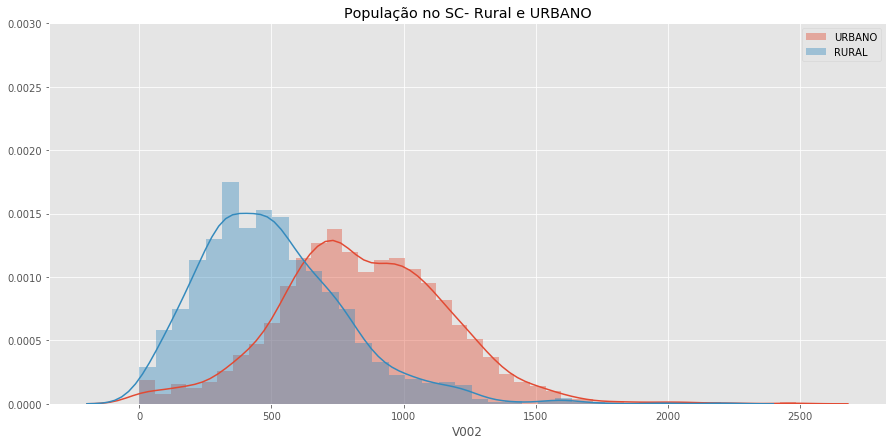

In [24]:
fig = plt.figure(figsize = (15,7))

sns.distplot(rn[rn['TIPO']=='URBANO']['V002'])
plt.legend(['URBANO'])
sns.distplot(rn[rn['TIPO']=='RURAL']['V002'])
plt.legend(['URBANO','RURAL'])
plt.title('População no SC- Rural e URBANO')
plt.ylim((0,0.003))

## Descrição do Número de moradores por setor censitários urbanos e rurais

In [25]:
print('RURAL','\n',rn[rn['TIPO']=='RURAL']['V002'].describe())
print('URBANO','\n',rn[rn['TIPO']=='URBANO']['V002'].describe())

RURAL 
 count    1385.000000
mean      506.451264
std       280.019378
min         0.000000
25%       311.000000
50%       472.000000
75%       663.000000
max      2201.000000
Name: V002, dtype: float64
URBANO 
 count    2904.000000
mean      845.660813
std       324.395301
min         0.000000
25%       636.000000
50%       831.000000
75%      1058.250000
max      2483.000000
Name: V002, dtype: float64


# Definindo os limites para filtrar os setores censitários 

In [36]:
max_area = areas_urbanas_rn_15['Area'].mean() 
min_pop =  rn[rn['TIPO']=='URBANO']['V002'].mean()
min_mor =  rn[rn['TIPO']=='URBANO']['V001'].mean()
min_densidade_moradias = rn[rn['TIPO']=='URBANO']['Densidade Moradias'].quantile(q = 0.25)

In [37]:
scrcu = rn[(rn.TIPO=='RURAL')&(rn.V001 >= min_mor)&(rn.AREA <= max_area)&(rn.V002>= min_pop)&(rn['Densidade Moradias']>=min_densidade_moradias)]

In [38]:
scrcu.describe()

,ID,CD_GEOCODI,Tipo_setor,V001,V002,AREA,Densidade Moradias
count,11.000000,1.100000e+01,11.0,11.000000,11.000000,11.000000,11.000000
mean,74334.727273,2.408223e+14,0.0,267.000000,1033.181818,0.237013,1385.410221
std,1288.313633,4.243216e+11,0.0,20.094775,128.108406,0.103045,717.559348
min,72672.000000,2.402204e+14,0.0,247.000000,854.000000,0.086809,736.647781
25%,73626.500000,2.405905e+14,0.0,249.500000,951.000000,0.166268,844.571615
50%,73878.000000,2.407104e+14,0.0,261.000000,1000.000000,0.202692,1363.366020
75%,75100.500000,2.410855e+14,0.0,280.500000,1123.000000,0.341363,1522.793917
max,76280.000000,2.414407e+14,0.0,305.000000,1226.000000,0.360347,2856.862913


Text(0.5,1,'SCRCU - Por Município')

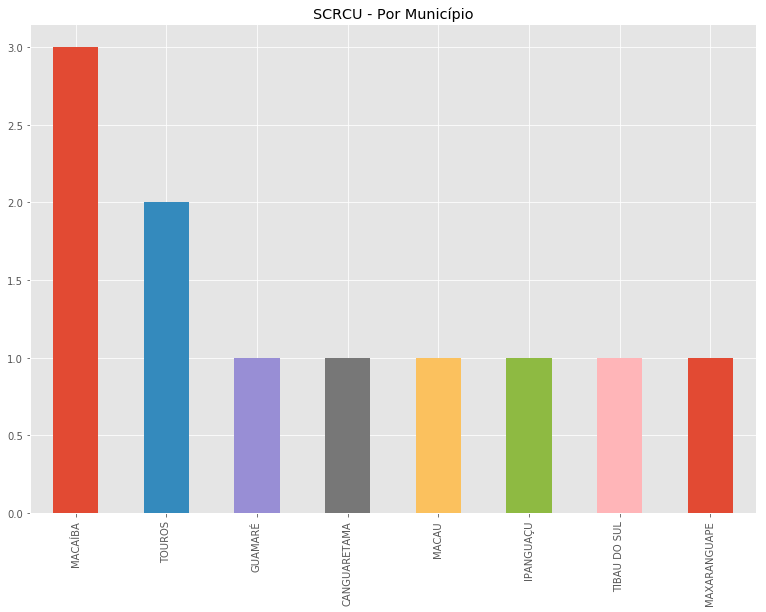

In [39]:
plt.style.use('ggplot')
scrcu.NM_MUNICIP.value_counts().plot.bar(figsize = (13,9))
plt.title('SCRCU - Por Município')

# Visualizando as areas urbanas no estado de RN - Sobrepondo scrcu e as regioes urbanas definidas pelo estudo da embrapa

/home/alan/.local/lib/python3.6/site-packages/geopandas/plotting.py:393: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  "'color'.", UserWarning)


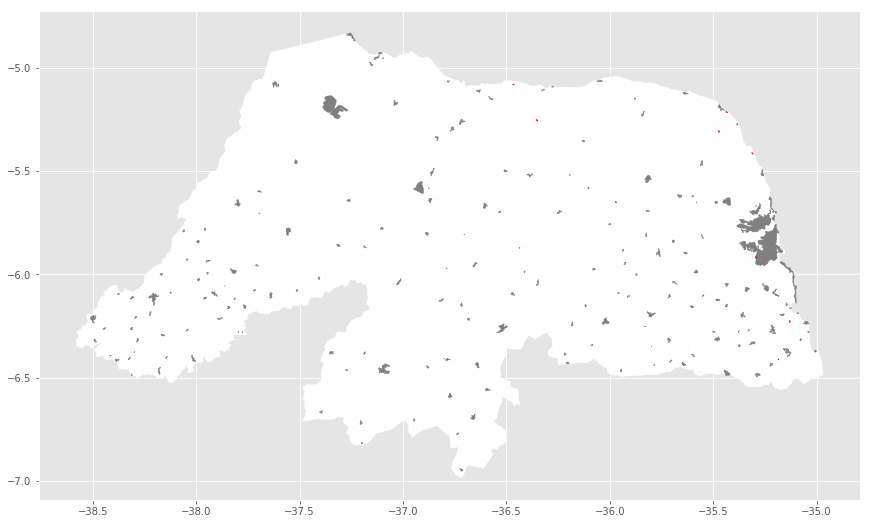

In [40]:
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize = (15,9))
ax.set_aspect('equal')
rn.plot(ax=ax, color='white', edgecolor='white')
areas_urbanas_rn_15.plot(ax=ax, color='gray', edgecolor='gray')
scrcu.plot(ax=ax,column = 'CD_GEOCODI',color = 'red',edgecolor='red')

In [41]:
areas_urbanas_rn_15.rename(columns={'Area':'AREA'},inplace = True)

In [42]:
fonte = np.zeros(areas_urbanas_rn_15.shape[0])
areas_urbanas_rn_15['FONTE'] = fonte

In [43]:
fonte_1 = np.zeros(scrcu.shape[0])+1
scrcu['FONTE'] = fonte_1

/usr/lib/python3/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [44]:
regioes_urbanas_rn = scrcu[['geometry','FONTE']].append(areas_urbanas_rn_15[['geometry','FONTE']])

In [45]:
regioes_urbanas_rn.head()

,geometry,FONTE
554,"POLYGON ((-35.1852956448904 -6.41416855666909,...",1.0
1265,"POLYGON ((-36.3471901459699 -5.25882002940375,...",1.0
1305,"POLYGON ((-36.8733720057852 -5.58418702398662,...",1.0
1709,"POLYGON ((-35.2910307322045 -5.9141590691335, ...",1.0
1736,"POLYGON ((-35.2905930383792 -5.90910281471885,...",1.0


In [46]:
def fonte(x):
    if x == 0:
        return 'EMBRAPA'
    return 'ALAN'
regioes_urbanas_rn['FONTE'] = regioes_urbanas_rn['FONTE'].apply(fonte) 

In [47]:
regioes_urbanas_rn.to_file(driver = 'ESRI Shapefile',filename ='regioes_urbanas_rn.shp')

In [55]:
import mplleaflet
f, ax = plt.subplots(1,figsize = (15,7))
regioes_urbanas_rn[regioes_urbanas_rn['FONTE']=='ALAN'].plot(ax=ax,color = 'red',edgecolor='black')
regioes_urbanas_rn[regioes_urbanas_rn['FONTE']=='EMBRAPA'].plot(ax=ax,color = 'purple',edgecolor='gray')

mplleaflet.display(fig=f,crs=regioes_urbanas_rn.crs)

In [56]:
mplleaflet.show(fig=f,crs=regioes_urbanas_rn.crs)